In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Model = automap_base()
# reflect the tables
Model.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Model.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Meas = Model.classes.measurement
Station = Model.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Meas.date).order_by(Meas.date.desc()).first()
recent_date

('2017-08-23',)

<Axes: xlabel='Date', ylabel='Inches'>

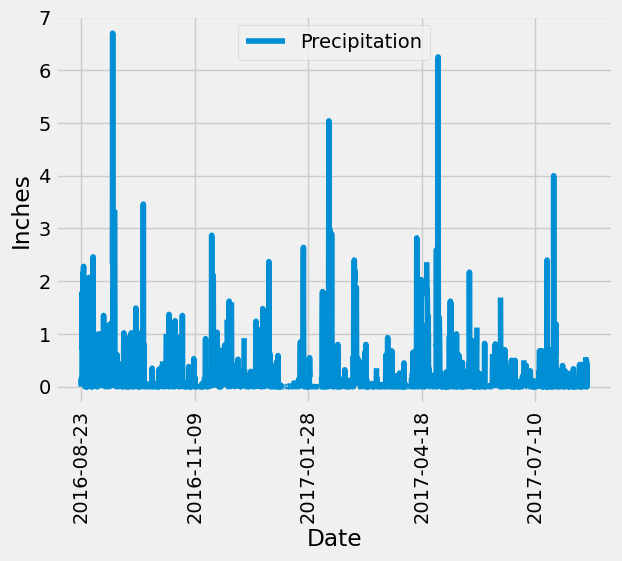

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = dt.datetime.strptime(recent_date[0], '%Y-%m-%d').date() - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
year_meas = (session.query(Meas).filter(Meas.date >= year).order_by(Meas.date).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(
    {
        'Dates': [row1.date for row1 in year_meas],
          'Precipitation': [row2.prcp for row2 in year_meas]
    }
)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Dates", ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind = "line", x = "Dates", y = "Precipitation", xlabel = "Date", ylabel = "Inches", rot=90)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
count_stations_query = session.query(func.count(Station.station)).all()

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_query = (session.query(Meas.station, func.count(Meas.station)).group_by(Meas.station).order_by(func.count(Meas.station).desc()).all()
)
active_stations_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_id = active_stations_query[0][0]

active_stats = (
    session.query(
        func.min(Meas.tobs),
        func.max(Meas.tobs),
        func.sum(Meas.tobs) / func.count(Meas.tobs),
    ).filter(Meas.station == active_id).all()
)
active_stats

[(54.0, 85.0, 71.66378066378067)]

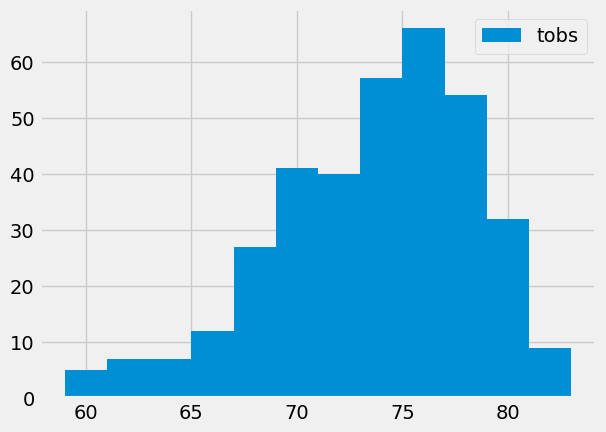

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_data = dt.datetime.strptime((session.query(Meas.date).filter((Meas.station == active_id)).order_by(Meas.date.desc()).first()[0]), '%Y-%m-%d').date() - dt.timedelta(days = 365)
results = session.query(Meas.tobs).filter((Meas.station == active_id)&(Meas.date >= year_data)).all()

station_df = pd.DataFrame({
    'tobs':[row[0] for row in results]
})

station_df['tobs'].hist(bins = 12, legend = True) #xlabel = 'Tempature', ylabel = 'Frequency')

plt.xlabel = 'Tempature'
plt.ylabel = 'Frequency'

# Display result
plt.show()

# Close Session

In [16]:
# Close Session
session.close()